# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key from a separate file
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) to print list of cities used in API call
output_data_file = "output_data/cities.csv"
output_data_file_2nd = "output_data/cities_2.csv"
output_data_file_3rd = "output_data/cities_3.csv"

# Range of latitudes and longitudes
# All combinations of latitudes and longitudes being selected will come from between the following parameters
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, we will get 1500 combinations of lat/lng coordinates.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# numpy uses random to get a list of numbers for each list, 1500 for lat, 1500 for lng.
# lat_lngs is zipped together to make one list out of two
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# for each combination in the list of lat_lng, use citipy to find the nearest city to the lat/lng location
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     citypy module is used to call out the city name for the list of lat/lng combinations

    # If the city is unique, then add it to a our cities list, otherwise move to the next combination
    if city not in cities:
        cities.append(city)

# Print the city count to confirm count out of the unique cities in the list.
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# set up the url using imperial units to gather different weather info points
units = "imperial"

# set up the query using the above url and the api_key from the OpenWeatherMap site, then print that query url to confirm API access
query_url = f"{url}appid={api_key}&units&q="
print(query_url)

# create a list for each data point that will be called for each city
cityname = []
countryname = []
latitude = []
longitude = []
maxtemp = []
humidity = []
cloudiness = []
date = []
windspeed = []


http://api.openweathermap.org/data/2.5/weather?appid=59166562bfec44e3e627176a07991947&units&q=


In [5]:
# start a count in order for the entire list of cities to be searched
count = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# partial query_url above, to get each data point for each city in the list, you must add the following code below
for city in cities:
# for each city in the overall list of cities gathered, find the following until the 500th city has been passed through and info has been gathered

    try:

        if (count > 500):
            break
#         start with a response to get the query_url for the city being focused on, then .json to gather all information.
#  then, the appends will add the relevant data points into each list that was created above
        response = requests.get(f"{query_url}{city}").json()
        cityname.append(response["name"])
        countryname.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        windspeed.append(response["wind"]["speed"])
#         once the data for the city in question is gathered, print the following statement to show the information has been gathered
        print(f"Processing data for City {count} ~ {city}")
        count += 1
        
        # wait for a second to avoid blocking the calls, gives buffer time between API calls
        time.sleep(1.00)
        
    except:
        print(f"{city} not found, moving on!")
#         this except function is used if the city in question does not have the data available in the OpenWeatherMap API
        
    continue
    
#     all information is gathered for each city that has data available

Beginning Data Retrieval
-----------------------------
Processing data for City 1 ~ cavalcante
Processing data for City 2 ~ rikitea
Processing data for City 3 ~ khatanga
Processing data for City 4 ~ ilulissat
Processing data for City 5 ~ cidreira
Processing data for City 6 ~ pevek
Processing data for City 7 ~ barrow
Processing data for City 8 ~ vaini
Processing data for City 9 ~ albany
Processing data for City 10 ~ veraval
Processing data for City 11 ~ kaitangata
Processing data for City 12 ~ avera
Processing data for City 13 ~ jamestown
Processing data for City 14 ~ dikson
Processing data for City 15 ~ ushuaia
Processing data for City 16 ~ berlevag
Processing data for City 17 ~ hobart
Processing data for City 18 ~ north bend
Processing data for City 19 ~ cururupu
Processing data for City 20 ~ punta arenas
Processing data for City 21 ~ nuuk
Processing data for City 22 ~ flin flon
Processing data for City 23 ~ buala
Processing data for City 24 ~ cape town
Processing data for City 25 ~ s

Processing data for City 187 ~ troitsko-pechorsk
Processing data for City 188 ~ hambantota
Processing data for City 189 ~ mumbwa
toftir not found, moving on!
Processing data for City 190 ~ aldan
Processing data for City 191 ~ kenora
Processing data for City 192 ~ tessalit
Processing data for City 193 ~ sao felix do xingu
Processing data for City 194 ~ cap malheureux
Processing data for City 195 ~ mount isa
Processing data for City 196 ~ ulaanbaatar
Processing data for City 197 ~ saint-philippe
Processing data for City 198 ~ jinka
Processing data for City 199 ~ port lincoln
Processing data for City 200 ~ kupang
Processing data for City 201 ~ tuatapere
Processing data for City 202 ~ inhambane
Processing data for City 203 ~ codrington
Processing data for City 204 ~ kalga
Processing data for City 205 ~ okha
Processing data for City 206 ~ trinidad
Processing data for City 207 ~ port augusta
Processing data for City 208 ~ auki
Processing data for City 209 ~ kaputa
Processing data for City 21

Processing data for City 380 ~ henties bay
Processing data for City 381 ~ magadan
barawe not found, moving on!
Processing data for City 382 ~ sovetskiy
Processing data for City 383 ~ cochrane
Processing data for City 384 ~ surt
kuche not found, moving on!
Processing data for City 385 ~ mvuma
Processing data for City 386 ~ carutapera
Processing data for City 387 ~ rudbar
Processing data for City 388 ~ buraydah
Processing data for City 389 ~ poronaysk
Processing data for City 390 ~ alappuzha
Processing data for City 391 ~ herat
Processing data for City 392 ~ praia da vitoria
Processing data for City 393 ~ tynda
Processing data for City 394 ~ mount gambier
Processing data for City 395 ~ leh
Processing data for City 396 ~ puerto ayacucho
Processing data for City 397 ~ abu samrah
Processing data for City 398 ~ powell river
Processing data for City 399 ~ naryan-mar
Processing data for City 400 ~ shu
Processing data for City 401 ~ tezu
Processing data for City 402 ~ tucupita
Processing data f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a dataframe in which to place all API data that was gathered. 
# list is used to gather each dataset that was grabbed from API. put each list together with titles for the dataframe
weather = {
    "City": cityname,
    "Cloudiness": cloudiness, 
    "Country": countryname,
    "Date": date, 
    "Humidity": humidity,
    "Latitude": latitude, 
    "Longitude": longitude, 
    "Max Temp": maxtemp,
    "Wind Speed":windspeed
}

# create a dataframe from the lists of info, will be the columns
# show the count of cities, should be 500 total
weather_df = pd.DataFrame(weather)
weather_df.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitude     500
Max Temp      500
Wind Speed    500
dtype: int64

In [7]:
weather_df.to_csv(output_data_file)
# export the dataframe with all cities to a csv
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Cavalcante,0,BR,1591749708,60,-13.80,-47.46,293.30,1.86
1,Rikitea,1,PF,1591749709,81,-23.12,-134.97,297.74,4.98
2,Khatanga,23,RU,1591749711,39,71.97,102.50,285.11,5.86
3,Ilulissat,100,GL,1591749712,74,69.22,-51.10,276.15,1.50
4,Cidreira,100,BR,1591749598,86,-30.18,-50.21,289.19,1.15


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
area = (30 * np.random.rand(len(weather_df)))**2
colors = np.random.rand(len(weather_df))
# randomize the colors for each city when displayed in a plot

#### Latitude vs. Temperature Plot

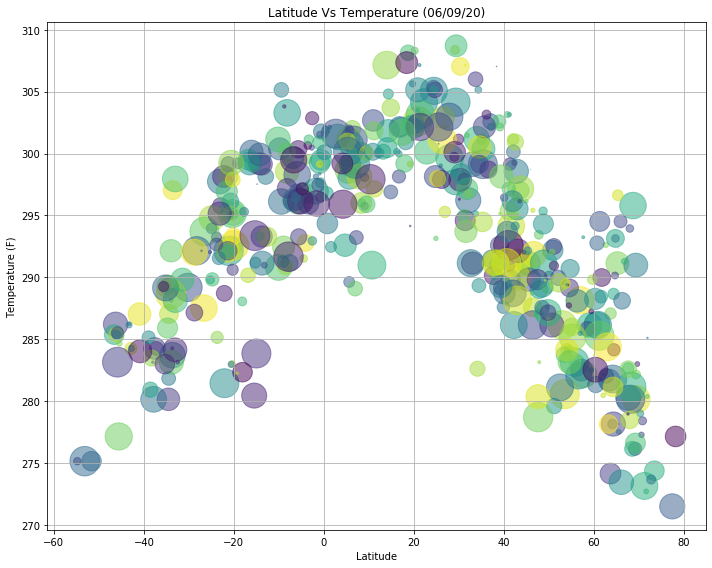

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", s=area, c=colors, alpha=0.5)
# choose the proper columns from the dataframe when creating the plot
plt.title(f"Latitude Vs Temperature ({time.strftime('%x')})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

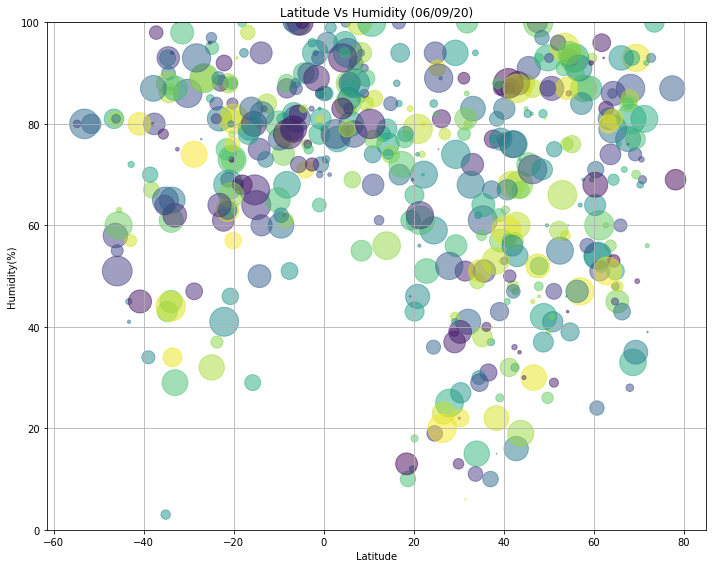

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.grid(True)


plt.tight_layout()
plt.savefig("LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

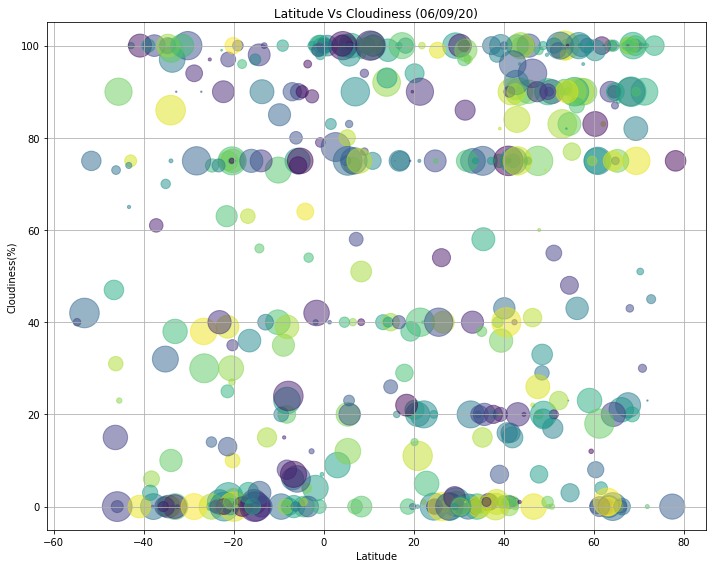

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

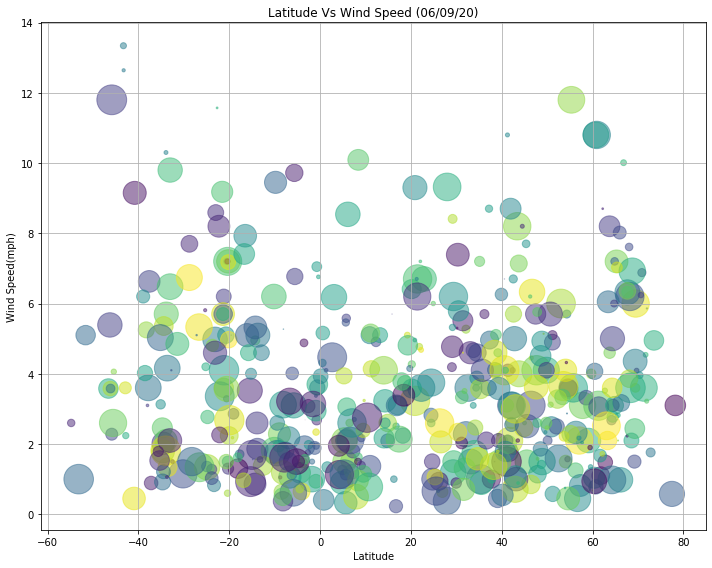

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsWindSpeed.png")
plt.show()

## Second City List and Analysis

### Create a new list of cities from random latitude and longitude combinations

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, we will get 1500 combinations of lat/lng coordinates.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# numpy uses random to get a list of numbers for each list, 1500 for lat, 1500 for lng.
# lat_lngs is zipped together to make one list out of two
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# for each combination in the list of lat_lng, use citipy to find the nearest city to the lat/lng location
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     citypy module is used to call out the city name for the list of lat/lng combinations

    # If the city is unique, then add it to a our cities list, otherwise move to the next combination
    if city not in cities:
        cities.append(city)

# Print the city count to confirm count out of the unique cities in the list.
len(cities)

606

## API Call

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# set up the url using imperial units to gather different weather info points
units = "imperial"

# set up the query using the above url and the api_key from the OpenWeatherMap site, then print that query url to confirm API access
query_url = f"{url}appid={api_key}&units&q="
print(query_url)

# create a list for each data point that will be called for each city
cityname = []
countryname = []
latitude = []
longitude = []
maxtemp = []
humidity = []
cloudiness = []
date = []
windspeed = []

http://api.openweathermap.org/data/2.5/weather?appid=59166562bfec44e3e627176a07991947&units&q=


In [5]:
# start a count in order for the entire list of cities to be searched
count = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# partial query_url above, to get each data point for each city in the list, you must add the following code below
for city in cities:
# for each city in the overall list of cities gathered, find the following until the 500th city has been passed through and info has been gathered

    try:

        if (count > 500):
            break
#         start with a response to get the query_url for the city being focused on, then .json to gather all information.
#  then, the appends will add the relevant data points into each list that was created above
        response = requests.get(f"{query_url}{city}").json()
        cityname.append(response["name"])
        countryname.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        windspeed.append(response["wind"]["speed"])
#         once the data for the city in question is gathered, print the following statement to show the information has been gathered
        print(f"Processing data for City {count} ~ {city}")
        count += 1
        
        # wait for a second to avoid blocking the calls, gives buffer time between API calls
        time.sleep(1.00)
        
    except:
        print(f"{city} not found, moving on!")
#         this except function is used if the city in question does not have the data available in the OpenWeatherMap API
        
    continue
    
#     all information is gathered for each city that has data available

Beginning Data Retrieval
-----------------------------
Processing data for City 1 ~ fergus falls
Processing data for City 2 ~ marsa matruh
Processing data for City 3 ~ pangnirtung
Processing data for City 4 ~ tamiahua
Processing data for City 5 ~ hermanus
Processing data for City 6 ~ port alfred
Processing data for City 7 ~ hami
Processing data for City 8 ~ lorengau
Processing data for City 9 ~ talnakh
Processing data for City 10 ~ tortoli
Processing data for City 11 ~ cape town
grand river south east not found, moving on!
Processing data for City 12 ~ makakilo city
samusu not found, moving on!
Processing data for City 13 ~ saint george
Processing data for City 14 ~ alofi
Processing data for City 15 ~ ushuaia
Processing data for City 16 ~ puerto ayora
Processing data for City 17 ~ rikitea
Processing data for City 18 ~ ust-kuyga
Processing data for City 19 ~ valdosta
Processing data for City 20 ~ harper
Processing data for City 21 ~ kapaa
Processing data for City 22 ~ khatanga
Processin

Processing data for City 188 ~ dikson
Processing data for City 189 ~ gilgit
Processing data for City 190 ~ nanortalik
Processing data for City 191 ~ adrar
Processing data for City 192 ~ zabid
Processing data for City 193 ~ perth
Processing data for City 194 ~ cap malheureux
Processing data for City 195 ~ cedar city
Processing data for City 196 ~ padang
Processing data for City 197 ~ pasighat
Processing data for City 198 ~ manoel urbano
Processing data for City 199 ~ kano
Processing data for City 200 ~ komsomolskiy
Processing data for City 201 ~ lavagna
Processing data for City 202 ~ port lincoln
Processing data for City 203 ~ sao joao da barra
Processing data for City 204 ~ okhotsk
Processing data for City 205 ~ sinnamary
Processing data for City 206 ~ vilya
Processing data for City 207 ~ gashua
Processing data for City 208 ~ puerto carreno
Processing data for City 209 ~ along
Processing data for City 210 ~ zhigansk
Processing data for City 211 ~ stettler
Processing data for City 212 ~

kamenskoye not found, moving on!
Processing data for City 383 ~ neuquen
Processing data for City 384 ~ fairbanks
Processing data for City 385 ~ bay roberts
Processing data for City 386 ~ seddon
Processing data for City 387 ~ shilka
Processing data for City 388 ~ pevek
Processing data for City 389 ~ kabalo
Processing data for City 390 ~ gejiu
Processing data for City 391 ~ airai
Processing data for City 392 ~ pangody
Processing data for City 393 ~ sumbawanga
Processing data for City 394 ~ birao
Processing data for City 395 ~ manadhoo
Processing data for City 396 ~ keshorai patan
Processing data for City 397 ~ la rioja
Processing data for City 398 ~ vardo
Processing data for City 399 ~ basco
Processing data for City 400 ~ honningsvag
Processing data for City 401 ~ dudinka
bargal not found, moving on!
Processing data for City 402 ~ karratha
Processing data for City 403 ~ cam ranh
Processing data for City 404 ~ leshukonskoye
Processing data for City 405 ~ manta
vaitupu not found, moving on

In [6]:
# create a dataframe in which to place all API data that was gathered. 
# list is used to gather each dataset that was grabbed from API. put each list together with titles for the dataframe
weather2 = {
    "City": cityname,
    "Cloudiness": cloudiness, 
    "Country": countryname,
    "Date": date, 
    "Humidity": humidity,
    "Latitude": latitude, 
    "Longitude": longitude, 
    "Max Temp": maxtemp,
    "Wind Speed":windspeed
}

# create a dataframe from the lists of info, will be the columns
# show the count of cities, should be 500 total
weather_df_2 = pd.DataFrame(weather2)
weather_df_2.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitude     500
Max Temp      500
Wind Speed    500
dtype: int64

In [3]:
weather_df_2.to_csv(output_data_file_2nd)
# export the new dataframe with all cities to a csv
weather_df_2.head()

NameError: name 'weather_df_2' is not defined

## Plotting the Data

In [8]:
area = (30 * np.random.rand(len(weather_df_2)))**2
colors = np.random.rand(len(weather_df_2))
# randomize the colors for each city when displayed in a plot

#### Latitude vs Temperature Plot

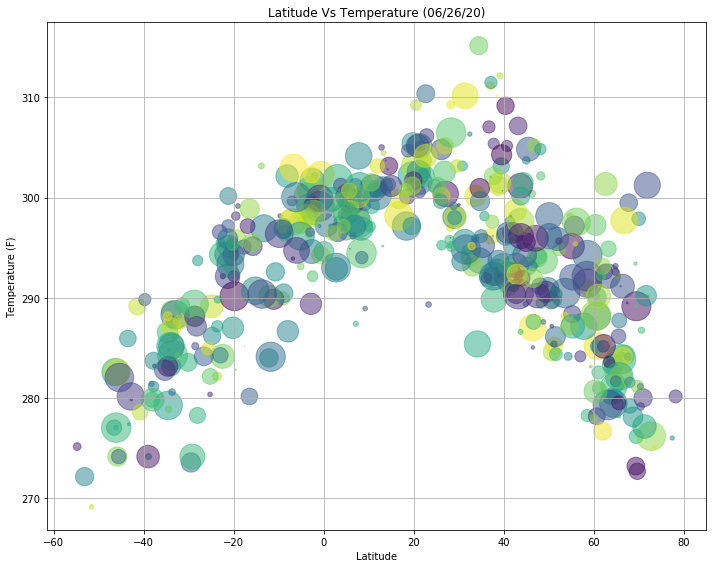

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_2["Latitude"], weather_df_2["Max Temp"], marker="o", s=area, c=colors, alpha=0.5)
# choose the proper columns from the dataframe when creating the plot
plt.title(f"Latitude Vs Temperature ({time.strftime('%x')})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsTemperature_2.png")
plt.show()

#### Latitude vs Humidity Plot

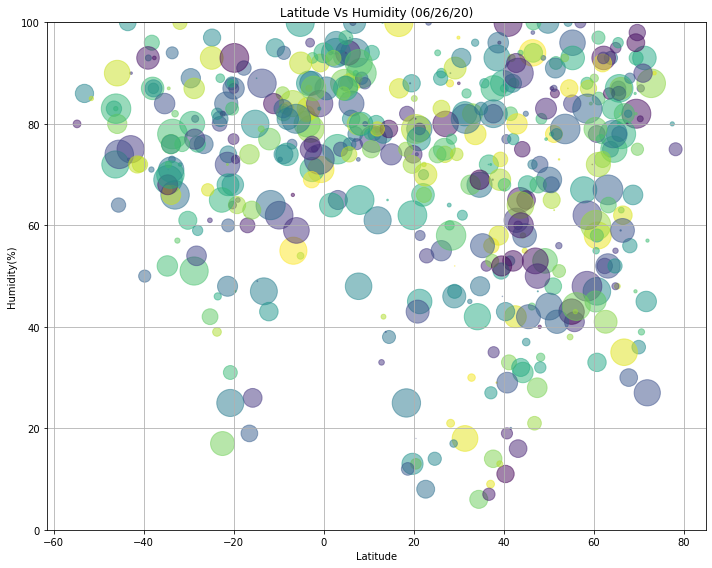

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_2["Latitude"], weather_df_2["Humidity"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.grid(True)


plt.tight_layout()
plt.savefig("LatitudeVsHumidity_2.png")
plt.show()

#### Latitude vs Cloudiness Plot

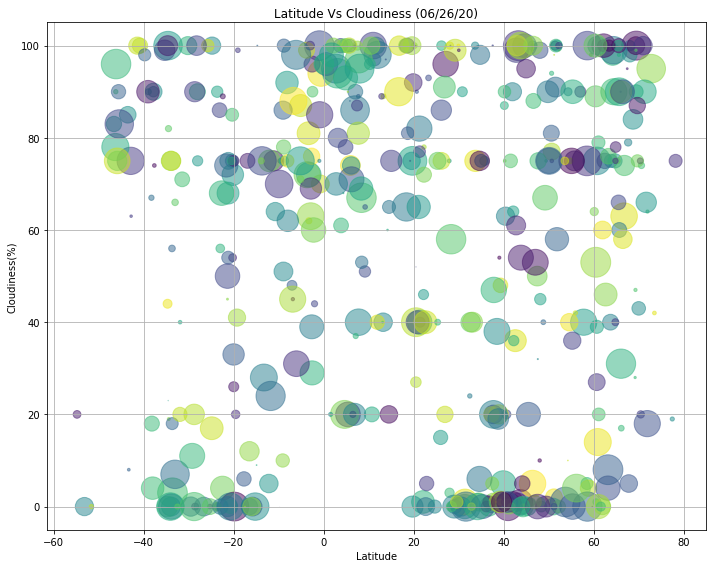

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_2["Latitude"], weather_df_2["Cloudiness"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsCloudiness_2.png")
plt.show()

#### Latitude vs Wind Speed Plot

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_2["Latitude"], weather_df_2["Wind Speed"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsWindSpeed_2.png")
plt.show()

NameError: name 'weather_df_2' is not defined

<Figure size 720x576 with 0 Axes>

## Third City List and Analysis

### Create a new list of cities from random latitude and longitude combinations

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations, we will get 1500 combinations of lat/lng coordinates.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# numpy uses random to get a list of numbers for each list, 1500 for lat, 1500 for lng.
# lat_lngs is zipped together to make one list out of two
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# for each combination in the list of lat_lng, use citipy to find the nearest city to the lat/lng location
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     citypy module is used to call out the city name for the list of lat/lng combinations

    # If the city is unique, then add it to a our cities list, otherwise move to the next combination
    if city not in cities:
        cities.append(city)

# Print the city count to confirm count out of the unique cities in the list.
len(cities)

610

## API Call

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# set up the url using imperial units to gather different weather info points
units = "imperial"

# set up the query using the above url and the api_key from the OpenWeatherMap site, then print that query url to confirm API access
query_url = f"{url}appid={api_key}&units&q="
print(query_url)

# create a list for each data point that will be called for each city
cityname = []
countryname = []
latitude = []
longitude = []
maxtemp = []
humidity = []
cloudiness = []
date = []
windspeed = []

http://api.openweathermap.org/data/2.5/weather?appid=59166562bfec44e3e627176a07991947&units&q=


In [7]:
# start a count in order for the entire list of cities to be searched
count = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# partial query_url above, to get each data point for each city in the list, you must add the following code below
for city in cities:
# for each city in the overall list of cities gathered, find the following until the 500th city has been passed through and info has been gathered

    try:

        if (count > 500):
            break
#         start with a response to get the query_url for the city being focused on, then .json to gather all information.
#  then, the appends will add the relevant data points into each list that was created above
        response = requests.get(f"{query_url}{city}").json()
        cityname.append(response["name"])
        countryname.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        windspeed.append(response["wind"]["speed"])
#         once the data for the city in question is gathered, print the following statement to show the information has been gathered
        print(f"Processing data for City {count} ~ {city}")
        count += 1
        
        # wait for a second to avoid blocking the calls, gives buffer time between API calls
        time.sleep(1.00)
        
    except:
        print(f"{city} not found, moving on!")
#         this except function is used if the city in question does not have the data available in the OpenWeatherMap API
        
    continue
    
#     all information is gathered for each city that has data available

Beginning Data Retrieval
-----------------------------
Processing data for City 1 ~ ushuaia
nizhneyansk not found, moving on!
belushya guba not found, moving on!
Processing data for City 2 ~ buin
Processing data for City 3 ~ rikitea
Processing data for City 4 ~ kodiak
Processing data for City 5 ~ picayune
Processing data for City 6 ~ barrow
Processing data for City 7 ~ payo
Processing data for City 8 ~ kapaa
Processing data for City 9 ~ busselton
Processing data for City 10 ~ bolo
Processing data for City 11 ~ hambantota
Processing data for City 12 ~ punta arenas
illoqqortoormiut not found, moving on!
Processing data for City 13 ~ vaini
Processing data for City 14 ~ qaanaaq
Processing data for City 15 ~ leshukonskoye
Processing data for City 16 ~ kupang
Processing data for City 17 ~ havoysund
Processing data for City 18 ~ bluff
Processing data for City 19 ~ te anau
Processing data for City 20 ~ rawson
sentyabrskiy not found, moving on!
Processing data for City 21 ~ puerto del rosario
P

Processing data for City 193 ~ margate
Processing data for City 194 ~ cabo san lucas
Processing data for City 195 ~ ternate
Processing data for City 196 ~ radlin
Processing data for City 197 ~ puerto madryn
Processing data for City 198 ~ calvinia
Processing data for City 199 ~ champerico
Processing data for City 200 ~ colac
Processing data for City 201 ~ ahuimanu
Processing data for City 202 ~ faanui
Processing data for City 203 ~ hobe sound
Processing data for City 204 ~ san rafael
Processing data for City 205 ~ savinskiy
Processing data for City 206 ~ bulaevo
Processing data for City 207 ~ calhoun
Processing data for City 208 ~ davila
Processing data for City 209 ~ jaisalmer
Processing data for City 210 ~ marawi
Processing data for City 211 ~ nortelandia
Processing data for City 212 ~ griffith
Processing data for City 213 ~ papara
Processing data for City 214 ~ floro
Processing data for City 215 ~ mareeba
Processing data for City 216 ~ gornopravdinsk
Processing data for City 217 ~ ma

Processing data for City 386 ~ nea alikarnassos
Processing data for City 387 ~ suluq
Processing data for City 388 ~ kuching
Processing data for City 389 ~ bagdarin
Processing data for City 390 ~ kysyl-syr
Processing data for City 391 ~ jamsa
Processing data for City 392 ~ komsomolskiy
Processing data for City 393 ~ faya
Processing data for City 394 ~ saint-joseph
fort saint john not found, moving on!
mys shmidta not found, moving on!
Processing data for City 395 ~ coquimbo
Processing data for City 396 ~ huercal-overa
Processing data for City 397 ~ san-pedro
Processing data for City 398 ~ cayenne
Processing data for City 399 ~ zhangye
Processing data for City 400 ~ turayf
Processing data for City 401 ~ cherskiy
kuche not found, moving on!
Processing data for City 402 ~ narrabri
Processing data for City 403 ~ port elizabeth
Processing data for City 404 ~ nuevo progreso
Processing data for City 405 ~ wajid
Processing data for City 406 ~ eyl
Processing data for City 407 ~ ilhabela
Processi

In [8]:
# create a dataframe in which to place all API data that was gathered. 
# list is used to gather each dataset that was grabbed from API. put each list together with titles for the dataframe
weather3 = {
    "City": cityname,
    "Cloudiness": cloudiness, 
    "Country": countryname,
    "Date": date, 
    "Humidity": humidity,
    "Latitude": latitude, 
    "Longitude": longitude, 
    "Max Temp": maxtemp,
    "Wind Speed":windspeed
}

# create a dataframe from the lists of info, will be the columns
# show the count of cities, should be 500 total
weather_df_3 = pd.DataFrame(weather3)
weather_df_3.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Latitude      500
Longitude     500
Max Temp      500
Wind Speed    500
dtype: int64

In [9]:
weather_df_3.to_csv(output_data_file_3rd)
# export the new dataframe with all cities to a csv
weather_df_3.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ushuaia,3,AR,1595280902,86,-54.80,-68.30,273.15,1.50
1,Buin,75,CL,1595280972,54,-33.73,-70.75,289.15,3.10
2,Rikitea,92,PF,1595280973,59,-23.12,-134.97,293.28,5.56
3,Saint Paul Harbor,1,US,1595280974,46,57.79,-152.41,296.15,6.70
4,Picayune,92,US,1595280976,77,30.53,-89.68,305.93,4.03


## Plotting the Data

In [10]:
area = (30 * np.random.rand(len(weather_df_3)))**2
colors = np.random.rand(len(weather_df_3))
# randomize the colors for each city when displayed in a plot

#### Latitude vs Temperature Plot

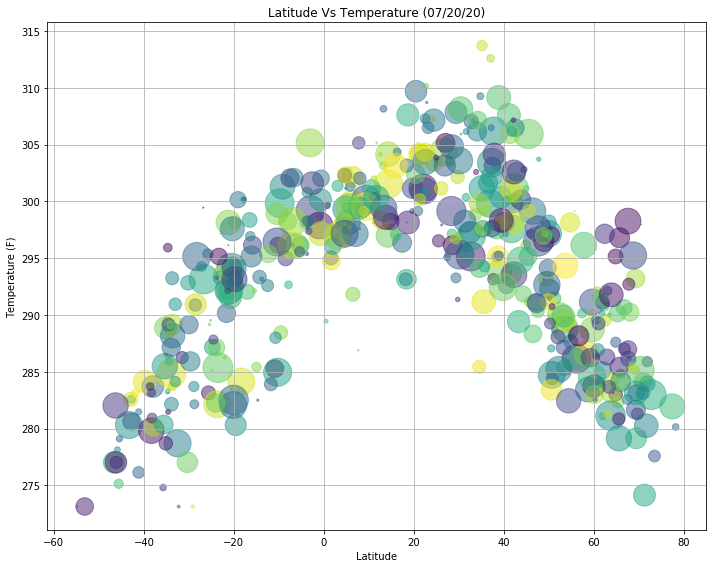

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_3["Latitude"], weather_df_3["Max Temp"], marker="o", s=area, c=colors, alpha=0.5)
# choose the proper columns from the dataframe when creating the plot
plt.title(f"Latitude Vs Temperature ({time.strftime('%x')})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsTemperature_3.png")
plt.show()

#### Latitude vs Humidity Plot

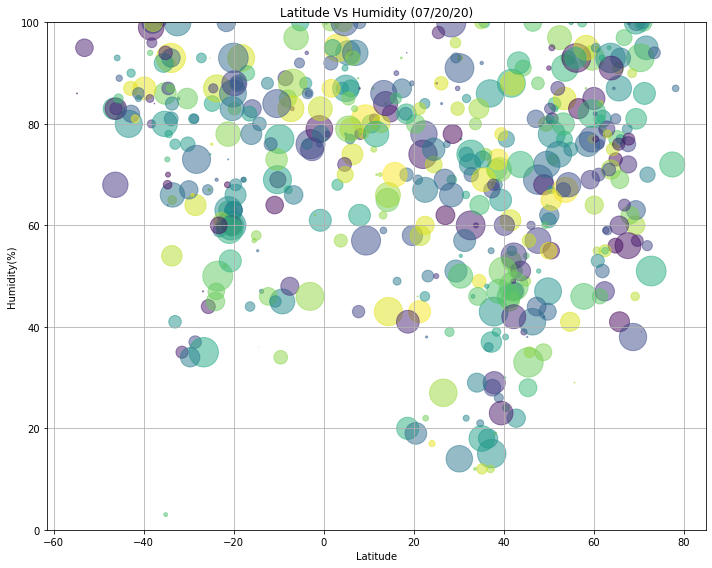

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_3["Latitude"], weather_df_3["Humidity"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.grid(True)


plt.tight_layout()
plt.savefig("LatitudeVsHumidity_3.png")
plt.show()

#### Latitude vs Cloudiness Plot

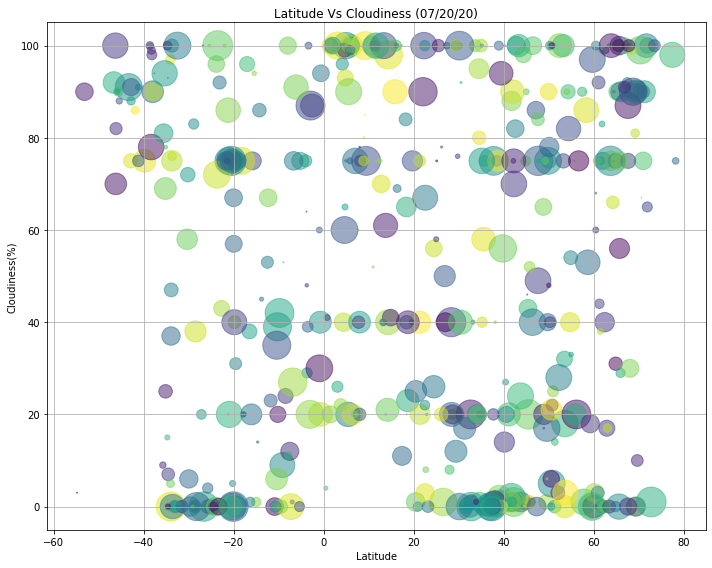

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_3["Latitude"], weather_df_3["Cloudiness"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsCloudiness_3.png")
plt.show()

#### Latitude vs Wind Speed Plot

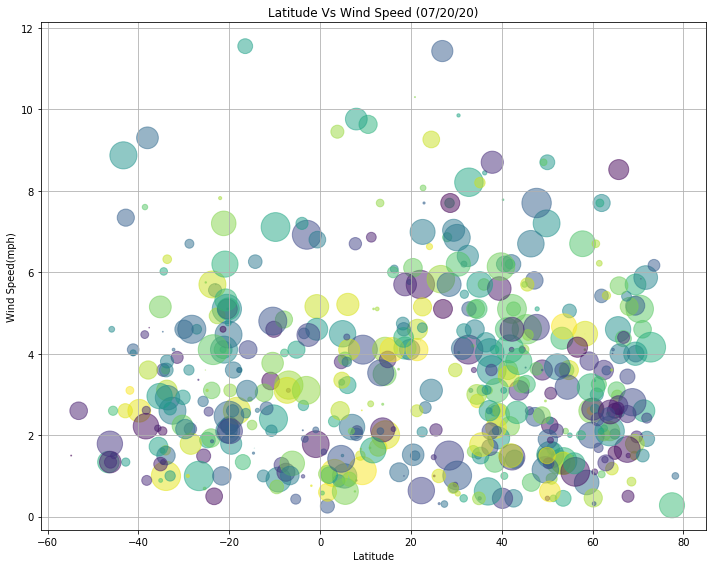

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(weather_df_3["Latitude"], weather_df_3["Wind Speed"], marker="o", s=area, c=colors, alpha=0.5)
plt.title(f"Latitude Vs Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.savefig("LatitudeVsWindSpeed_3.png")
plt.show()